# Ice Game Sales Analysis


We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We will need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.


We are planning for 2017 sales in order to make predictions on what games and platforms will be the most advantageous to focus on.


The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

### Goal: 
Test our hypotheses:
- There will not be a significant difference in genre, platform, and rating preferences between regions
- Average user scores of the Xbox One and PC platforms are the same.
- Average user scores for the Action and Sports genres are different.
- - - - 

&emsp;We believe that the market as a whole will not vary based on region, and believe that the international sales will be the same as regional. We will seek to answer the questions of what causes differences in sales between platforms and genres if there are any differences.

### Stages 
Our project will consist of six stages:
 1. Data overview
 2. Preparing the Data 
     -Fixing Data
     -Enriching Data
 3. Analyzing Data
 4. Determining Differences Across Regions
 5. Testing statistical hypotheses
 6. Conclusion

## Initialization

First we will begin by importing all necessary libraries.

In [1]:
import pandas as pd# Loading all the libraries
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm
from scipy import stats as st

### Loading in the Data

Now we will add our data into a dataframe.

In [2]:
#loading in data with try/except
try:
    games= pd.read_csv('/datasets/games.csv')
except:
    print('File not found.')

## Preparing the Data

Now we will take a closer look at our data, and see if there is anything that needs to altered or added to.

### Viewing General Information

In [3]:
games.info() #printing general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe(include = 'all') #viewing general description for all

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [5]:
games.dtypes #printing data types

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [6]:
games.head() #viewing the top of the data set

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games.isna().sum() #getting a count of missing values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
games.isna().sum()*100/len(games) #finding the percentage of data that is missing
pd.DataFrame(round((games.isna().mean()*100),2)).style.background_gradient('coolwarm')
games.isna().mean() * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [9]:
games.duplicated().sum() #checking for duplicates

0

&emsp;From analyzing the data, we can see that there are several issues that need to be addressed prior to conducting an analysis. There are several categories which are the wrong data type, and there are issues with names of columns not having standardized capitalization. There are no duplicates, but we do have several columns which have missing data. We will need to address these factors prior to testing our hypotheses. 

### Fixing the Data

#### Fixing Column Names

We will start with addressing the issues with capitalization for our column names. Not following a capitalization standard makes errors more likely, so we will utilize snake-case and only leave capitals where they stand for an abbreviation.

In [10]:
games.columns #viewing current column names

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [11]:
#changing column names to correct case
games.columns= ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games.columns #checking they were changed correctly

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Handling Missing Values

Now we will handle our missing values, starting with rating.


In [12]:
games['rating'].value_counts() #finding listing of all rating values

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [13]:
games['rating'] = games['rating'].fillna('None') #replacing blank ratings with "None"
games.isna().sum() #making sure values were filled

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

Now for the columns name, genre, and year of release. These all have less than two percent data missing, so we will opt to drop these from our data for ease of analysis. There are no ways to infer this data from other columns in the data frame, so dropping these columns is the easiest way to handle these missing values. 

In [14]:
games = games.dropna(subset=['name', 'year_of_release', 'genre']) #dropping rows with missing values in these columns
games.isna().sum() #checking that values were dropped appropriately

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Now we are left with two columns which contain missing values: critic_score and user_score. For these we will treat them as if having a missing value means that they just have not been rated yet. Thus we will choose not to fill these missing values in. When we are doing hypothesis testing we will elect to ignore NaN values. However, there is still the issue of TBD values in these columns. For these, we will convert them to a NaN value in order to follow the same rules of handling. 

In [15]:
games['user_score'].replace('tbd', np.nan, inplace=True) #replacing tbd with NaN value

In [16]:
games['user_score'].unique() #ensuring no TBD value

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [17]:
games['user_score'].replace('tbd', np.nan, inplace=True) #replacing tbd with NaN value

In [18]:
games['critic_score'].unique() #ensuring no TBD value

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

#### Changing Column Types

Now we will examine and address issues with column data types

In [19]:
games.dtypes #checking data types

name                object
platform            object
year_of_release    float64
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [20]:
games['year_of_release'] = games['year_of_release'].astype('int') #converting year to an integer
games.dtypes #checking type was converted

name                object
platform            object
year_of_release      int64
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [21]:
games['user_score'] = games['user_score'].astype('float') #converting score to a floating decimal
games.dtypes #checking conversion worked

name                object
platform            object
year_of_release      int64
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [22]:
games['critic_score'] = games['critic_score'].astype('float') #converting score to a floating decimal
games.dtypes #checking that column type was converted

name                object
platform            object
year_of_release      int64
genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Now we have converted all necessary data types. We have changed the year to an integer, as parts of a year are not necessary for our calculations. In addition, we converted our scores to numeric float types now that we have removed the string value of TBD. This makes arithmetic operations possible. We will leave name, platform and rating as strings, and will leave all our sales as float values since this makes the most sense with money.

#### Adding Calculated Total Revenue

Next, we will calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [23]:
#creating calculated total sales by adding all locational sales together
games['total_sales'] = games['NA_sales'] + games['EU_sales'] + games['JP_sales'] + games['other_sales'] 
games.head() #making sure column was added correctly

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38


## Analyzing the Data

Now that we have completed cleaning up our data, we will move on to our analysis.

### Number of Games per Year
The first section we will investigate is the number of games released per year. We are making an analysis to determine sales in 2017, so we will see if there is data which can be excluded for our future data.

In [24]:
yearly_data = games[['year_of_release', 'name']].groupby('year_of_release').count()
display(yearly_data)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


From this picture, we see there is a significant decrease in sales prior to 1994, there were probably significantly less games released prior to that year. There is aslso a decrease in the year 2016, but this is probably due to the data not being complete for the most recent year. Sales may not be fully available yet for those games sold towards the end of the year.

### Platform Sales

Next we will look at how sales varied from platform to platform. We will choose the platforms with the greatest total sales and view how they are distibuted year by year. We will also investigate the average lifespan of a platform.

We will start by finding the five platforms with the highest sales overall.

In [25]:
platform_data = games[['platform', 'total_sales']].groupby(['platform']).sum().reset_index()
platform_data.columns = ['platform', 'total_sales']
platform_data.sort_values(by = 'total_sales', ascending= False, inplace=True)
display(platform_data)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


We see that the five platforms with the highest overall sales are : PS2, X360, PS3, Wii and DS. Now we will look at the distribution of the top ten performing platforms over time. 

In [26]:
#creating list of top ten platforms
top_ten = ['PS2','X360','PS3','Wii','DS','PS','PS4','GBA','PSP']

In [27]:
#creating sorted data by platform and year
yearly_data = games[['platform', 'year_of_release', 'total_sales']].groupby(['platform', 'year_of_release']).count().reset_index()
#only keeping the data for the top ten platforms
yearly_data = yearly_data.query('platform in @top_ten')

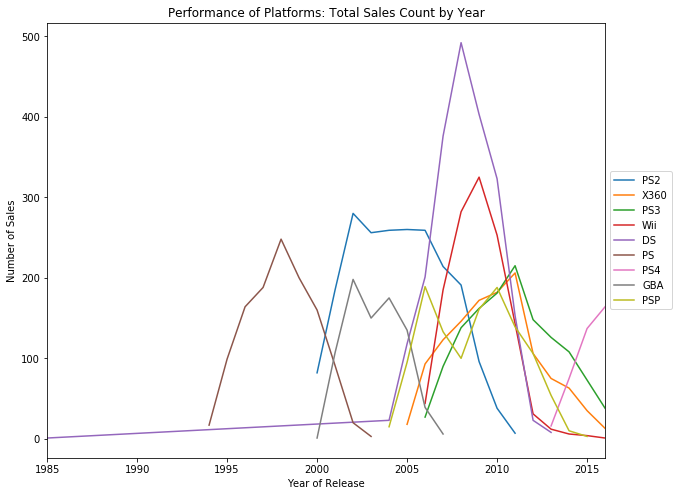

In [28]:
#creating a plot of the top ten platforms
fig, ax = plt.subplots(figsize=(10,8))
for p in top_ten:
    df2 = yearly_data.loc[yearly_data['platform'] == p]
    df2.plot('year_of_release', 'total_sales', ax=ax, label=p)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance of Platforms: Total Sales Count by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Sales')
plt.show()

From our graph we can see that DS became very popular between 2005 to 2010, but then quickly dropped off close to zero by the mid 2010s. PS also became popular in the late-1990s, then dropped off to practically zero by the early 2000s. We can see the average lifespan of a platform is just under 10 years. New platforms tend to appear about halfway through the decline of the previous, however in more recent years there seem to be more platforms coming out more frequently. 

Now we will do a deeper analysis for sales since 2010, since these are the most recent years, they will show platforms that are most commonly used, as well as those which are becoming more popular.

In [29]:
#creating sorted data by platform and year
new_year_data = games[['platform', 'year_of_release', 'total_sales']].groupby(['platform', 'year_of_release']).count().reset_index()
#only keeping the data for the top ten platforms
new_year_data = new_year_data.query('year_of_release > 2010')
new_year_p = new_year_data['platform'].unique()

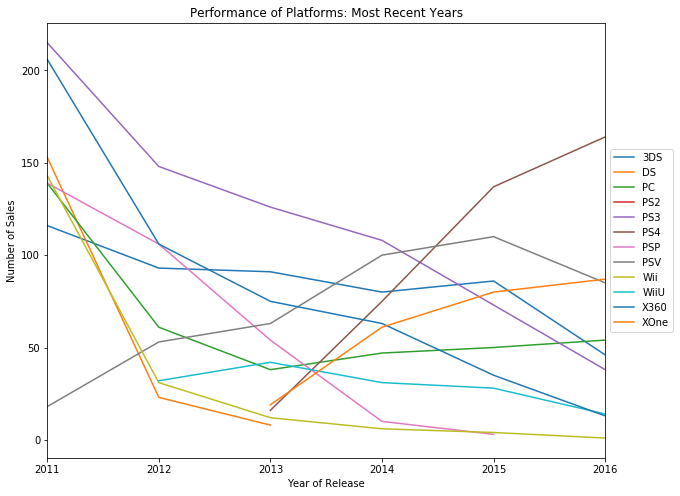

In [30]:
#creating a plot of the top ten platforms
fig, ax = plt.subplots(figsize=(10,8))
for p in new_year_p:
    df2 = new_year_data.loc[new_year_data['platform'] == p]
    df2.plot('year_of_release', 'total_sales', ax=ax, label=p)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Performance of Platforms: Most Recent Years')
plt.xlabel('Year of Release')
plt.ylabel('Number of Sales')
plt.show()

Looking at the data from the most recent years, we can see that PS4 has gotten more popular as well as XOne. These are expected to continue to rise in popularity with the upcoming year. There are also several platforms which appear to be on the decline this year including the PSV, 3DS and X360. 

For our next analysis, we will select sales since 1994, and only include platforms which have been present since 2010.

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
new_games = games.query('year_of_release > 2014')
new_games = new_games.query('platform in @new_year_p')

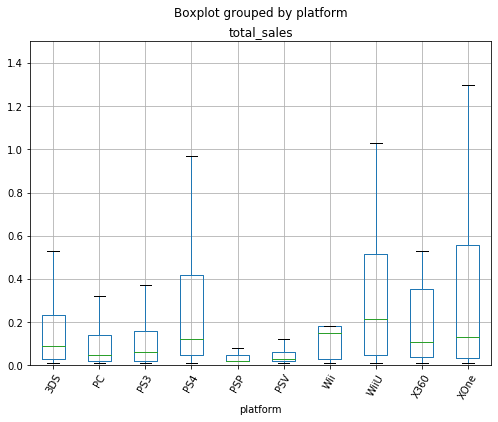

In [33]:
new_games.boxplot(column= 'total_sales', by='platform', rot=60, figsize=(8,6), showfliers= False)
plt.ylim(0, 1.5)
plt.show()

We can see that the total sales averages do vary between the platforms. PS3 and X360 have the highest averages, closely followed by Xone, PS2, and Wii U. There is some degree of variation between each of them, and all have a significant number of upper outliers.

### Reviews Affect on Sales

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

For this section we will select XOne to analyze. 

In [34]:
xone_data = new_games.query('platform == "XOne"') #creating subset of data for our platform

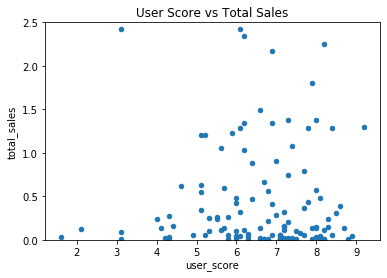

In [35]:
xone_data.plot.scatter(x='user_score', y='total_sales') #plotting user score vs total sales
plt.title("User Score vs Total Sales")
plt.ylim(0,2.5)
plt.show()

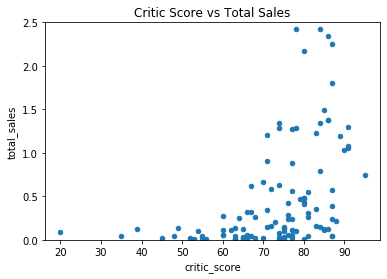

In [36]:
xone_data.plot.scatter(x='critic_score', y='total_sales') #plotting critic score vs total sales
plt.title('Critic Score vs Total Sales')
plt.ylim(0,2.5)
plt.show()

In [37]:
user_score_corr = xone_data['user_score'].corr(xone_data['total_sales'])
print(f'The Pearson correlation coefficient for User Score and Total Sales: {user_score_corr}')
critic_score_corr = xone_data['critic_score'].corr(xone_data['total_sales'])
print(f'The Pearson correlation coefficient for Critic Score and Total Sales: {critic_score_corr}')

The Pearson correlation coefficient for User Score and Total Sales: -0.04146733387366271
The Pearson correlation coefficient for Critic Score and Total Sales: 0.43088874582136805


&emsp;After examining these two graphs and correlation coefficients we can see that there is a moderate positive correlation between critic score and total sales. However, we see that there is almost no relation between user score and total sales. This may be due to the fact that critics are more likely to have an impartial view of the game, whereas users are more likely to be driven by personal preference and thus will rate a game lower or higher based on their bias rather than how good the game actually is. People also may be more likely to purchase a game that is critically acclaimed rather than one that is solely rated well by users.

### Individual Game Sales Across Platforms

Now we will investigate how individual games perform across different platforms.

In [38]:
new_games['name'].value_counts() #seeing games which are present across multiple platforms

LEGO Jurassic World                          8
Skylanders: SuperChargers                    7
LEGO Marvel's Avengers                       7
Lego Star Wars: The Force Awakens            7
Just Dance 2016                              6
                                            ..
Gudetama: Hanjuku de Tanomuwa                1
Uta no Prince-Sama: Music 3                  1
New Tokyo Legacy: Operation Babel            1
Super Mario Maker                            1
The Great Mystery Hidden Object Package 5    1
Name: name, Length: 654, dtype: int64

In [39]:
pop_games = ["LEGO Marvel's Avengers", 'Skylanders: SuperChargers', 'Lego Star Wars: The Force Awakens'] #selecting three that have multiple platforms
#creating subsets of data for the three cross-platform games
marvel_data = new_games.query('name == @pop_games[0]')
sky_data = new_games.query('name == @pop_games[1]')
star_data = new_games.query('name == @pop_games[2]')

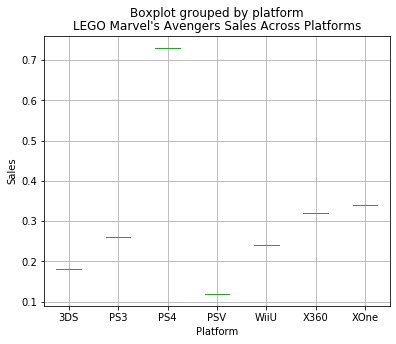

In [40]:
marvel_data.boxplot(column='total_sales', by='platform', figsize=(6,5), showfliers=False)
plt.title("LEGO Marvel's Avengers Sales Across Platforms")
plt.xlabel("Platform")
plt.ylabel('Sales')
plt.show()

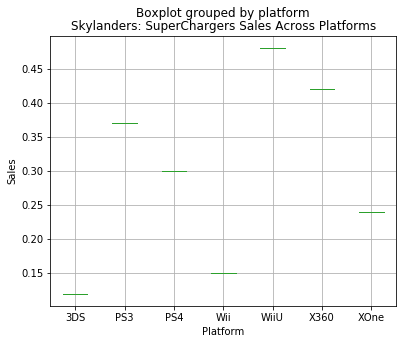

In [41]:
sky_data.boxplot(column='total_sales', by='platform', figsize=(6,5), showfliers=False)
plt.title("Skylanders: SuperChargers Sales Across Platforms")
plt.xlabel("Platform")
plt.ylabel('Sales')
plt.show()

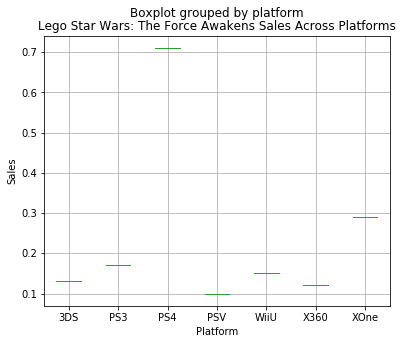

In [42]:
star_data.boxplot(column='total_sales', by='platform', figsize=(6,5), showfliers=False)
plt.title("Lego Star Wars: The Force Awakens Sales Across Platforms")
plt.xlabel("Platform")
plt.ylabel('Sales')
plt.show()

From these graphs, we can make some generalizations about video game performance across multiple platforms. X360 overall tends to have the best sales, with PS4 also being higher than others. Wii and DS games tend to perform worse in overall sales. 

### Genre Popularity

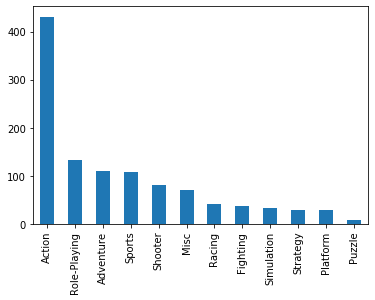

In [43]:
new_games['genre'].value_counts().plot(kind='bar')
plt.show()

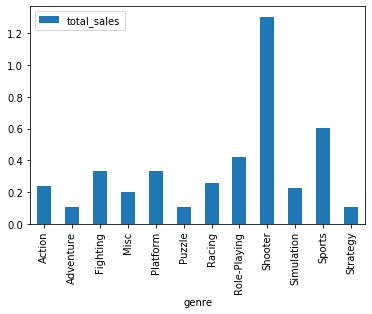

In [44]:
new_games[['genre','total_sales']].groupby('genre').mean().plot(kind='bar') #creating bar chart of total sales by genre
plt.show()

From this we can see that action and sports are the most popular games, with platforming and puzzle the least popular based on number of titles. However, we can see from the second graph that shooters made significantly more sales than action games on average, so while there are less shooters, they tend to make more money.

## Regional Analysis

Now we will analyze our regional sales based on platform, genre and rating. We will start with looking at platform performance in our three regions: North America, Europe and Japan

In [45]:
NA_platform_data = new_games[['platform','NA_sales']].groupby('platform').sum().reset_index() #finding sum of sales by platform
NA_platform_data.columns = ['platform', 'total_NA_sales']
NA_platform_data.sort_values(by='total_NA_sales', ascending=False, inplace=True) #sorting in descending order
NA_platform_data.head() #printing top 5 platforms

,platform,total_NA_sales
3,PS4,63.86
9,XOne,50.30
0,3DS,10.31
7,WiiU,8.86
8,X360,8.05


We can see in North America the most popular platforms based on overall sales are: X360, PS2, Wii, PS3, DS.

In [46]:
EU_platform_data = new_games[['platform', 'EU_sales']].groupby('platform').sum().reset_index()#finding sum of sales by platform
EU_platform_data.columns = ['platform', 'total_EU_sales']
EU_platform_data.sort_values(by='total_EU_sales', ascending=False, inplace=True) #sorting in descending order
EU_platform_data.head()#printing top 5 platforms

,platform,total_EU_sales
3,PS4,83.54
9,XOne,28.10
1,PC,9.10
0,3DS,7.39
2,PS3,7.30


We can see that Europe has similar, but slightly different platform preferences to North American sales: PS2, PS3, X360, Wii, 3DS. We can also see that on average, all of the platforms have higher overall sales in North America vs Europe.

In [47]:
JP_platform_data = new_games[['platform', 'JP_sales']].groupby('platform').sum().reset_index()#finding sum of sales by platform
JP_platform_data.columns = ['platform', 'total_JP_sales']
JP_platform_data.sort_values(by='total_JP_sales', ascending=False, inplace=True) #sorting in descending order
JP_platform_data.head()#printing top 5 platforms

,platform,total_JP_sales
0,3DS,23.55
3,PS4,12.05
5,PSV,8.41
2,PS3,4.97
7,WiiU,4.12


Japan is a bit different in its platform preferences, with DS being the most popular. After that are PS2, 3DS, PS3 and PC. We can see overall that Japan has the lowest overall sales, but this may just be due to  population size overall.

In [48]:
NA_genre_data = new_games[['genre', 'NA_sales']].groupby('genre').sum().reset_index() #finding sum of sales by genre
NA_genre_data.columns = ['genre', 'total_NA_sales']
NA_genre_data.sort_values(by='total_NA_sales', ascending=False, inplace=True)#sorting in descending order
NA_genre_data.head() #printing top 5 values

,genre,total_NA_sales
8,Shooter,48.18
0,Action,33.68
10,Sports,26.31
7,Role-Playing,19.82
3,Misc,5.58


For North America, the most popular genre is Action, followed by sports, shooters, miscellaneous and role-playing games.

In [49]:
EU_genre_data = new_games[['genre', 'EU_sales']].groupby('genre').sum().reset_index()#finding sum of sales by genre
EU_genre_data.columns = ['genre', 'total_EU_sales']
EU_genre_data.sort_values(by='total_EU_sales', ascending=False, inplace=True)#sorting in descending order
EU_genre_data.head() #printing top 5 values

,genre,total_EU_sales
8,Shooter,40.28
0,Action,34.82
10,Sports,27.82
7,Role-Playing,17.21
6,Racing,6.52


Europe shares most of the same popular genres as North America. The main difference is that Racing is in the top five for Europe instead of role playing.

In [50]:
JP_genre_data = new_games[['genre', 'JP_sales']].groupby('genre').sum().reset_index()#finding sum of sales by genre
JP_genre_data.columns = ['genre', 'total_JP_sales']
JP_genre_data.sort_values(by='total_JP_sales', ascending=False, inplace=True)#sorting in descending order
JP_genre_data.head() #printing top 5 values

,genre,total_JP_sales
0,Action,23.05
7,Role-Playing,13.41
8,Shooter,3.79
3,Misc,3.19
1,Adventure,2.22


Japan actually favors very different genres than those of other locations. We can see that Role-playing is actually the most popular, followed by action, miscellaneous, sports and finally platforming.

Do ESRB ratings affect sales in individual regions

In [51]:
NA_rating_data = new_games[['rating', 'NA_sales']].groupby('rating').sum().reset_index() #finding sum of sales by rating
NA_rating_data.columns = ['rating', 'total_NA_sales']
NA_rating_data.sort_values(by='total_NA_sales', ascending=False, inplace=True)#sorting in descending order
NA_rating_data.head() #printing top 5 values

,rating,total_NA_sales
2,M,47.03
3,None,37.44
0,E,26.59
4,T,22.86
1,E10+,17.87


We can see that E has the highest overall sales, following by mature and teen. E10+ is the least popular, but this may be due to it being a less common rating overall.

In [52]:
EU_rating_data = new_games[['rating', 'EU_sales']].groupby('rating').sum().reset_index()#finding sum of sales by rating
EU_rating_data.columns = ['rating', 'total_EU_sales']
EU_rating_data.sort_values(by='total_EU_sales', ascending=False, inplace=True)#sorting in descending order
EU_rating_data.head() #printing top 5 values

,rating,total_EU_sales
2,M,45.54
3,None,35.71
0,E,34.83
4,T,20.32
1,E10+,11.54


We see that Europe shares the same popularity across ratings as North America.

In [53]:
JP_rating_data = new_games[['rating', 'JP_sales']].groupby('rating').sum().reset_index()#finding sum of sales by rating
JP_rating_data.columns = ['rating', 'total_JP_sales']
JP_rating_data.sort_values(by='total_JP_sales', ascending=False, inplace=True)#sorting in descending order
JP_rating_data.head() #printing top 5 values

,rating,total_JP_sales
3,None,32.89
4,T,7.70
0,E,5.25
2,M,4.29
1,E10+,3.27


It seems that games that never received a rating make up a much larger portion of Japan sales than it does in the other regions. However, the other ratings seem to be arranged in the same order. 

Overall we can see that Europe and North America tend to have very similar markets, and that Japan does differ some, but for the most part if a title succeeds in one region it will tend to do well in the others as well. 

## Testing Hypotheses
In this section we will be testing two hypotheses. 

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

### Xbox One vs PC Ratings
First we will test that average user ratings for Xbox One and PC are the same.

We will use 5% as our alpha value, as a standard for statistical significance. 

We will use the individual t-test, which is is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

**H0:** There is no difference in average user ratings between Xbox One and PC platforms.

**H1:** There is a difference in average user ratings between Xbox One and PC platforms

In [54]:
xone_data = new_games.query('platform == "XOne"')
pc_data = new_games.query('platform == "PC"')

xone_user_score = xone_data['user_score']
pc_user_score = pc_data['user_score']

In [55]:
alpha = 0.05 #set a critical statistical significance level

results1 = st.ttest_ind(xone_user_score, pc_user_score, nan_policy='omit') # conduct the test and calculate the p-value

print('p-value:', results1.pvalue)

if results1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.2778542084733873
We can't reject the null hypothesis


Since we cannot reject our null hypothesis, we can conclude that there is not a statistically significant difference between user ratings for games on the XBox one vs PC. We are not able to tell in what way it is affected based solely on this test, but this gives us opportunity for future investigation if this information is deemed useful.

### Action vs Sports Ratings
Now we will test that average user ratings for Action and Sports genres are different.

We will use 5% as our alpha value, as a standard for statistical significance. 

We will use the individual t-test, which is is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

**H0:** There is no difference in average user ratings between Sports and Action genres.

**H1:** There is a difference in average user ratings between Sports and Action genres.

In [56]:
action_data = new_games.query('genre == "Action"')
sports_data = new_games.query('genre == "Sports"')

action_user_score = action_data['user_score']
sports_user_score = sports_data['user_score']

In [57]:
alpha = 0.05 # set a critical statistical significance level

results2 = st.ttest_ind(action_user_score, sports_user_score, nan_policy='omit') #conduct the test and calculate the p-value

print('p-value:', results2.pvalue)

if results2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.0012846807938715e-13
We reject the null hypothesis


Since we rejected our null hypothesis, this confirms that there is a statistically significant difference in user score for Action vs Sports. This confirms our individual hypothesis, but we do not have the data to understand why there is a difference. Perhaps this is because players of the games have different standards for what a good action vs sports game is.

## Conclusion

In this analysis we cleaned our data by removing unnecessary data. We selected games made since 2014, but only consoles from the most recent decade. We elected not to replace missing values for our ratings, since there would not be an accurate way to replace them based on the data we were given.

We conducted our analysis and found that the average lifespan of a platform is just under ten years, and were able to see that PS4 and Xbox One were the consoles that were the most likely to have an increase in sales in the upcoming year. It would be our recommendation to pursue creating games under those two platforms.

Next we examined sales per region. Our hypothesis was that they would have similar market preferences for rating, platforms and genres. We were partially correct, as North American and European sales were incredibly similar for all aspects, but Japan tended to differ much more significantly. It is our recommedation that if an action or sports game is created it would be better to advertise to North America and Europe, whereas role-playing or platforming games are more likely to be successful in Japan. In addition, handheld console games like the DS and 3DS tend to do better in Japan, whereas consoles like PS4 and Xbox one will do better in North America and Europe.

Finally, we used statistical testing to prove that there is not a difference in user rating between platforms, in this case between Xbox One and PC, which proved our hypothesis. We also showed that there is a difference in user rating between action and sports games. 

All of this information has given us a full understanding of the data, which has allowed us to make accurate predictions for the 2017 year.